#### 1. Estadistica descriptivas de datos

In [42]:
# Importamos la paqueterÍa de pandas
import pandas as pd # manejo de datos
import numpy as np # manejo de arreglos tablas y matrices
import matplotlib.pyplot as plt # libreria para graficar
import seaborn as sns # Graficar series de tiempo 

#Cargar datos
data = pd.read_csv('BostonHousing.csv')
data2 = pd.read_csv('BankChurners.csv')

data.info()

# Para datos nulos
data.isnull().sum()

#Estadisticos descriptivos de oda la base con solo dos decimales
data2.describe()
data2.describe().round(2) # Redondear a dos decimales

# De una sola variable
data2['Credit_Limit'].describe().round(2)

# Estadisticos descriptivos particulares de una columna/variable
data[['CRIM','MEDV']].mean().round(2)
data['CRIM'].median()
data['CRIM'].mode()
data['CRIM'].std()
data['CRIM'].var()
data['CRIM'].min()
data['CRIM'].max()
data['CRIM'].quantile(0.25)
data['CRIM'].quantile(0.30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  CAT_MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


np.float64(0.099245)

In [43]:
# Filtrar datos donde el género es 'F'
datos_f = data2[data2['Gender'] =='F']
edad_promedio = datos_f['Customer_Age'].mean().round(2)
print('Edad promedio de los clientes femeninos:',edad_promedio)

Edad promedio de los clientes femeninos: 46.46


In [44]:
# Filtrar datos donde el género es 'M'
datos_h = data2[data2['Gender'] !='F'] # DAME TODOS LOS QUE NO SON F
edad_promedio = datos_h['Customer_Age'].mean().round(2)
print('Edad promedio de los clientes hombres:',edad_promedio)

Edad promedio de los clientes hombres: 46.18


#### 2. Tablas de frecuencias, correlación y cruzadas

In [45]:
# Convertir la colunna a tipo categórico a Transformar variable Education Level a categórica
data2['Education_Level'] = data2['Education_Level'].astype('category')
data2['Education_Level'] = pd.Categorical(data2['Education_Level'], categories=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'], ordered=True)
data2['Education_Level'].unique()
                                                           
#Tabla de frecuencias de una variable ordenadas
data2['Education_Level'].value_counts().sort_index()
data2['Marital_Status'].value_counts().sort_index()

#⁠Tabla de frecuencias relativas (porcentaje) de una variable
data2['Education_Level'].value_counts(normalize = True).sort_index().round(2)
datos_h['Education_Level'].value_counts(normalize = True).sort_index().round(4) * 100

Education_Level
College          10.09
Doctorate         4.07
Graduate         30.57
High School      20.65
Post-Graduate     5.31
Uneducated       14.49
Unknown          14.82
Name: proportion, dtype: float64

In [46]:
# Tabla de correlaciones entre variables
data.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


In [47]:
# Convertir columnas categoricas a numericas
data2_encoded = data2.copy()
data2_encoded['Education_Level'] = data2_encoded['Education_Level'].astype('category').cat.codes
data2_encoded['Marital_Status'] = data2_encoded['Marital_Status'].astype('category').cat.codes

# Tabla de correlaciones entre variables especificas
data2_encoded[['Education_Level','Marital_Status']].corr().round(2)
data[['CRIM','MEDV']].corr().round(2)

,CRIM,MEDV
CRIM,1.00,-0.39
MEDV,-0.39,1.00


In [48]:
# Tabla cruzada de dos variables
pd.crosstab(data2['Education_Level'], data2['Marital_Status'])

# Tabla cruzada de dos variables con porcentajes
tabla1= pd.crosstab(data2['Education_Level'], data2['Marital_Status'], normalize = 'columns').round(2) #IMPORTANTE PONER "COLUMNS" O "INDEX", NO TRUE
print(tabla1)

tabla2=pd.crosstab(data2['Education_Level'], data2['Marital_Status'], normalize = 'index').round(2)
print(tabla2)

Marital_Status   Divorced  Married  Single  Unknown
Education_Level                                    
Uneducated           0.21     0.16    0.18     0.17
High School          0.20     0.24    0.24     0.24
College              0.13     0.12    0.12     0.12
Graduate             0.35     0.37    0.36     0.36
Post-Graduate        0.06     0.06    0.06     0.07
Doctorate            0.06     0.05    0.05     0.04
Marital_Status   Divorced  Married  Single  Unknown
Education_Level                                    
Uneducated           0.09     0.44    0.39     0.07
High School          0.06     0.47    0.39     0.08
College              0.08     0.46    0.38     0.07
Graduate             0.07     0.47    0.38     0.07
Post-Graduate        0.08     0.47    0.37     0.08
Doctorate            0.08     0.45    0.40     0.06


#### 3. Gráficos
##### 3.1. Circular/Pie

<Axes: title={'center': 'Nivel de educación de los clientes'}>

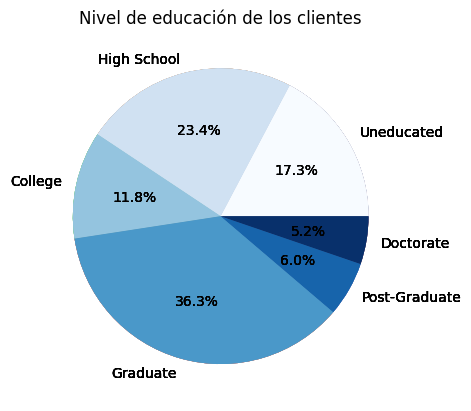

In [49]:
# Gráfico de barras de una variable
data2['Education_Level'].value_counts().sort_index().plot(kind='pie')

# Agregar porcentaje a la gráfica
data2['Education_Level'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')

# Cambiar colores de la gráfica
data2['Education_Level'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Colores monocromaticos cambie por intensidad
data2['Education_Level'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', colormap='Blues')

# Agregar título y etiquetas
data2['Education_Level'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', colormap='Blues', title='Nivel de educación de los clientes', ylabel='')


##### HISTOGRAMA/BARRA

<Axes: title={'center': 'Nivel de educación de los clientes'}, xlabel='Nivel de educación', ylabel='Porcentaje'>

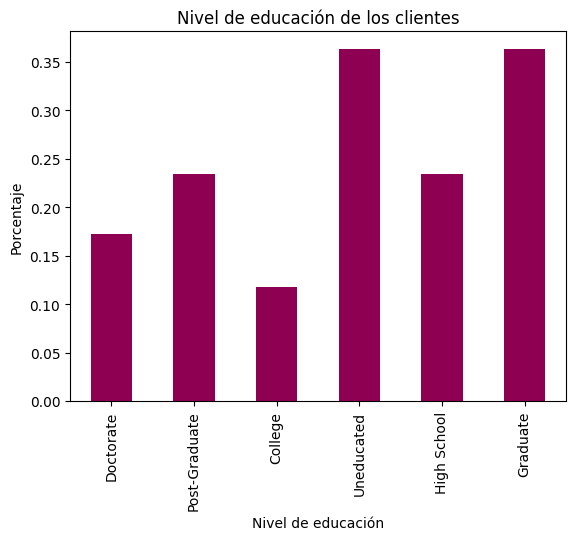

In [50]:
data2['Education_Level'].value_counts(normalize=True).sort_index().plot(kind='bar')

#Agregar título y etiquetas
data2['Education_Level'].value_counts(normalize=True).sort_index().plot(kind='bar', title='Nivel de educación de los clientes', ylabel='Porcentaje', xlabel='Nivel de educación')

#Cambiar colores de la gráfica
data2['Education_Level'].value_counts(normalize=True).sort_index().plot(kind='bar', title='Nivel de educación de los clientes', ylabel='Porcentaje', xlabel='Nivel de educación', color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Colores monocromaticos cambie por intensidad
data2['Education_Level'].value_counts(normalize=True).sort_index().plot(kind='bar', title='Nivel de educación de los clientes', ylabel='Porcentaje', xlabel='Nivel de educación', colormap='PiYG')

# Grafica de barras con porcentaje
data2['Education_Level'].value_counts(normalize=True).sort_index().plot(kind='bar', title='Nivel de educación de los clientes', ylabel='Porcentaje', xlabel='Nivel de educación', colormap='PiYG')

## Grafica de barras con porcentaje ordenada
data2['Education_Level'].value_counts(normalize=True).sort_values().plot(kind='bar', title='Nivel de educación de los clientes', ylabel='Porcentaje', xlabel='Nivel de educación', colormap='PiYG')


NameError: name 'p' is not defined

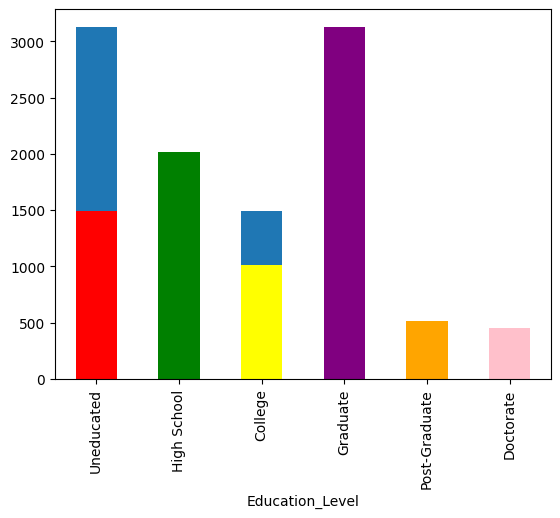

In [51]:
#grafica de barras una variable 
data2['Education_Level'].value_counts().plot(kind='bar')
#grafica de barras de una variable ordenada 
data2['Education_Level'].value_counts().sort_index().plot(kind='bar')
#grafica de barras de una variable ordenada y con colores 
data2['Education_Level'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'yellow', 'purple', 'orange', 'pink'])
#grafica de barras por porcentaje
data2['Education_Level'].value_counts(normalize = True).sort_index().plot(kind='bar')

# que significa el color azul en la barra de uneducated
p

In [ ]:
print(data2["Education_Level"].isnull().sum())


1519


<Axes: title={'center': 'Nivel de educación de los clientes'}, xlabel='Nivel de educación', ylabel='Porcentaje'>

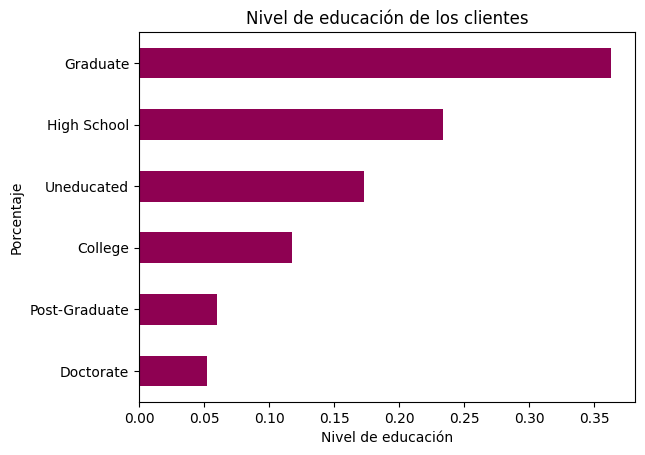

In [ ]:
# HORIZONTAL
data2['Education_Level'].value_counts(normalize=True).sort_values().plot(kind='barh', title='Nivel de educación de los clientes', ylabel='Porcentaje', xlabel='Nivel de educación', colormap='PiYG')

<Axes: xlabel='Education_Level'>

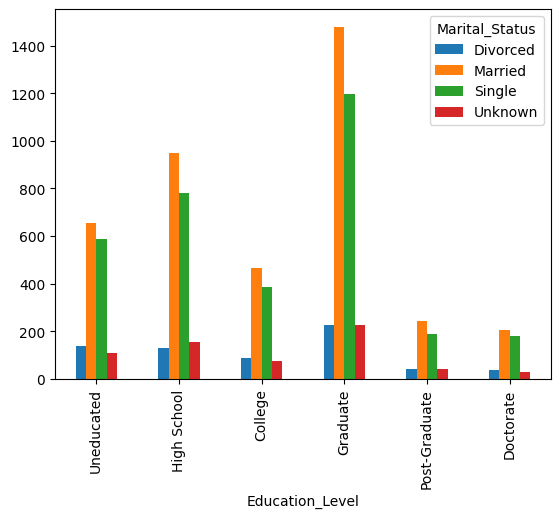

In [ ]:
# Gráfica de barras de dos variables
pd.crosstab(data2['Education_Level'], data2['Marital_Status']).plot(kind='bar')

##### 3.3 Disperción/Lineales

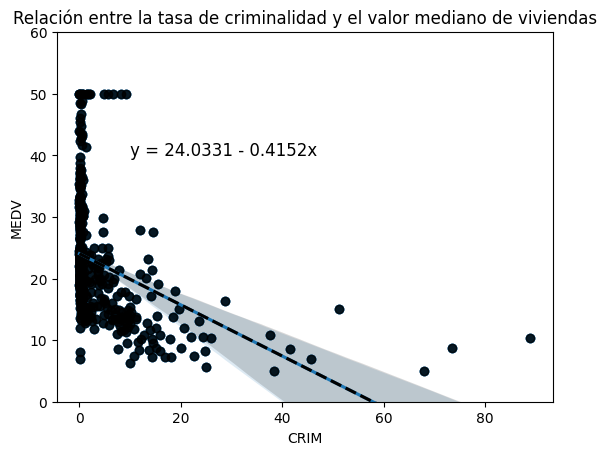

In [ ]:
# Grafica de dispersion de dos variables
plt.scatter(data['CRIM'], data['MEDV'])

# Agregar título y etiquetas
plt.xlabel('Tasa de criminalidad (CRIM)')
plt.ylabel('Valor Mediano de Viviendas (MEDV)')
plt.title('Relación entre la tasa de criminalidad y el valor mediano de viviendas')

# Agregar línea de tendencia
sns.regplot(x='CRIM', y='MEDV', data=data)

#Agregar ecuación de la línea de tendencia
plt.text(10, 40, 'y = 24.0331 - 0.4152x', fontsize=12)

# Línea de tendencia que no pase del 0 en los ejes
plt.ylim(0, 60)

# Línea de tendencia negra y punteada
sns.regplot(x='CRIM', y='MEDV', data=data, color='black', line_kws={'linestyle': '--'})

plt.show()


#### 3.4 Mapa de correlación

In [52]:
#tabla de correlacion
data.corr()

#correlacion de datos variables 
data['CRIM'].corr(data['MEDV'])

#tabla de correlacion de dos variables 
data[['CRIM', 'MEDV']].corr()

,CRIM,MEDV
CRIM,1.000000,-0.388305
MEDV,-0.388305,1.000000


<Axes: >

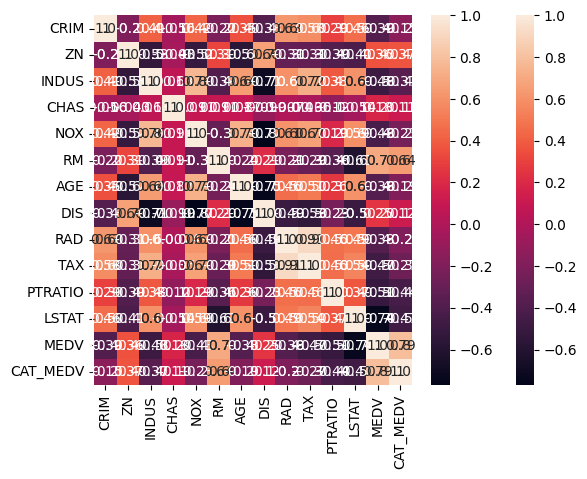

In [53]:
#mpada de correlaciones 
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True)

#cambiar tamaño de los numeros de la correlacion 
sns.heatmap(numerical_data.corr(), annot=True, fmt='.1f')   

<Axes: >

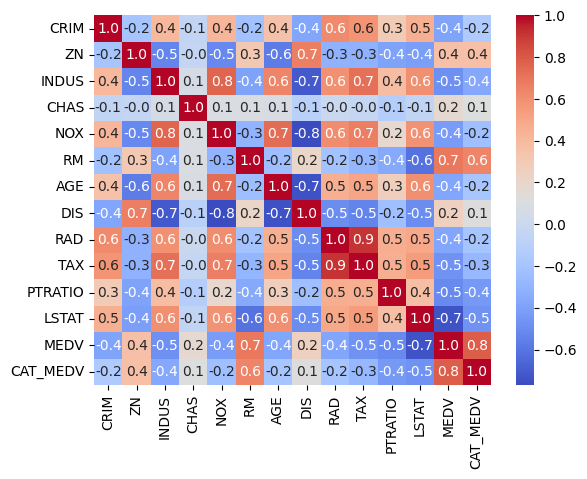

In [54]:
#cambiar los colores del mapa de correlaciones 
sns.heatmap(numerical_data.corr(), annot=True, fmt='.1f', cmap='coolwarm')

#### 3.5 Series de tiempo

Text(0.5, 1.0, 'Tasa de empleo femenino 2007-2024')

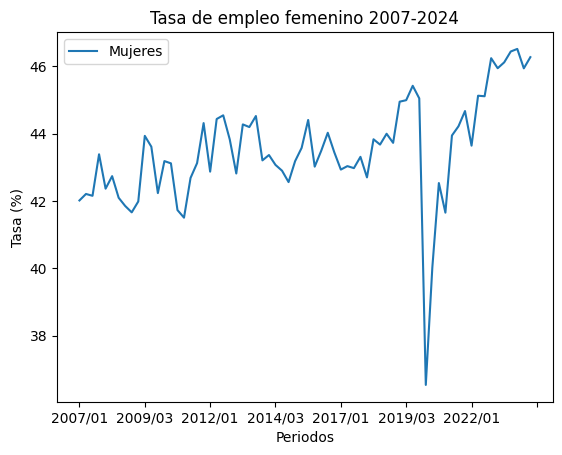

In [55]:
#guardar archivo excel en datos3 

data3 = pd.read_excel('Empleo_mujeres(1).xlsx')

#Grafica de series de tiempo 
data3.plot(x= 'Periodos', y='Mujeres', kind='line')

#Agregar etiquetas a los ejes y titulo al grafico 
plt.xlabel('Periodos') #nombre del eje x
plt.ylabel('Tasa (%)') #nombre del eje y
plt.title('Tasa de empleo femenino 2007-2024') #titulo del grafico

In [56]:
#instalamos lo necesario para descompones una serie de tiempo 
#%pip install statsmodels # se le pone el porcentaje si lo corremos desde aqui , pero en la terminal se lo quitamos 
from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'statsmodels'

In [57]:
# descomponsicion de la serie de tiempo
result = seasonal_decompose(data3['Mujeres'], model='multiplicative', period=1)

#grafica la serie de tiempo 
result.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined

In [58]:
import geopandas as gpd
import folium 
from folium.plugins import HeatMap

#cargar el archivo geografico de Mexico (GeoJSON o Shapefile)
#asegurate de tener la ruta correcta al archivo
mapa_mexico = gpd.read_file('mexico.json') 
mapa_mexico.head()

#ordenamos los estados por la columna NOM_ENT
mapa_mexico = mapa_mexico.sort_values(by='state_name')
mapa_mexico.head()

,id,state_code,state_name,geometry
19,None,1,Aguascalientes,"POLYGON ((-102.2533 22.37458, -102.18896 22.36..."
5,None,2,Baja California,"MULTIPOLYGON (((-115.2138 28.37512, -115.16752..."
7,None,3,Baja California Sur,"MULTIPOLYGON (((-109.80049 24.15197, -109.8020..."
30,None,4,Campeche,"POLYGON ((-90.38193 20.7496, -90.38193 20.7470..."
15,None,7,Chiapas,"POLYGON ((-91.81435 17.90028, -91.77948 17.849..."


In [59]:
accidentes = pd.read_excel('ATUS_1.xlsx') 
accidentes.head(20)

# Quitamos las observaciones de la cero a la 5
accidentes = accidentes[6:38]
accidentes.head(33)

#Eliminamos la primer columna
accidentes = accidentes.drop(accidentes.columns[0], axis=1)
accidentes.head(33)

# Renombramos las columnas
accidentes.columns = ['Estado', 'Accidentes']

# Reiniciamos el index
accidentes = accidentes.reset_index(drop=True)
accidentes.head(33)

,Estado,Accidentes
0,Aguascalientes,4473.0
1,Baja California,11782.0
2,Baja California Sur,6045.0
3,Campeche,4574.0
4,Coahuila de Zaragoza,10876.0
5,Colima,6225.0
6,Chiapas,4065.0
7,Chihuahua,26559.0
8,Ciudad de México,7276.0
9,Durango,11631.0


In [60]:
# Unir la base de accidentes con el mapa de México
# Asegurate de que la columna 'Estado' en ambos DataFrames sea la misma
mexico = mapa_mexico.merge(accidentes, left_on='state_name', right_on='Estado')
mexico.head()

# Crear un mapa centrado en Mexico
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Opcion 2: Crear un mapa coropletico (coloreado por estado)
folium.Choropleth(
    geo_data=mexico, # Datos geograficos
    name="Accidentes por estado",
    data=mexico,  # Datos numericos
    columns=['Estado', 'Accidentes'], # Columnas para el valor
    key_on='feature.properties.state_name', # Clave para unir los dos
    fill_color='YlOrRd', # Colores
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Número de accidentes'
).add_to(m)

# Mostrar el mapa
m